In [2]:
#Importing important libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Loading the dataset

data = pd.read_csv('Walmart DataSet.csv')  

In [4]:
#Displaying the first few rows of the dataset:

data.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [5]:
#Displaying the last few rows of the dataset:

data.tail(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


# Satistical Analysis:

In [6]:
#Overall shape of the data:

data.shape

(6435, 8)

In [7]:
#Checking the total no of stores:

data['Store'].nunique()

45

In [8]:
#Summary statistics of numerical variables:

data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [9]:
#Checking the information:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


As we can see date is in object datatype, so we have to change the data type to datetime.

We can also change the datatype for Holiday Flag to Boolean and Store to category.

# Data Preprocessing:

In [10]:
#Changing Store column to categorical type:

data['Store'] = data.Store.astype('category')

In [11]:
#Changing Holiday_Flag column to boolean type:

data['Holiday_Flag'] = data['Holiday_Flag'].astype(bool)

Since the date column is object type, we first have to convert it to datetime.

In [12]:
#Converting the 'Date' column to datetime format:

data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   category      
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   bool          
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: bool(1), category(1), datetime64[ns](1), float64(5)
memory usage: 315.7 KB


In [13]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Week'] = data['Date'].dt.week

C:\Users\PC\AppData\Local\Temp\ipykernel_21940\235201722.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data['Week'] = data['Date'].dt.week


In [14]:
#Setting 'Date' column as index:
data.set_index('Date', inplace=True)

Now, we have to check is there any null or missing values in the dataset and perform the analysis based on that.

In [15]:
#Checking for null values
null_values = data.isnull().sum()
print("Null Values:\n", null_values)

#Checking for missing values
missing_values = data.isna().sum()  # 'isna()' is an alias for 'isnull()'
print("\nMissing Values:\n", missing_values)

Null Values:
 Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Year            0
Month           0
Week            0
dtype: int64

Missing Values:
 Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Year            0
Month           0
Week            0
dtype: int64


There is no missing and null value in each column. Hence we can move ahead.



# Exploratory Data Analysis:

## Outlier analysis

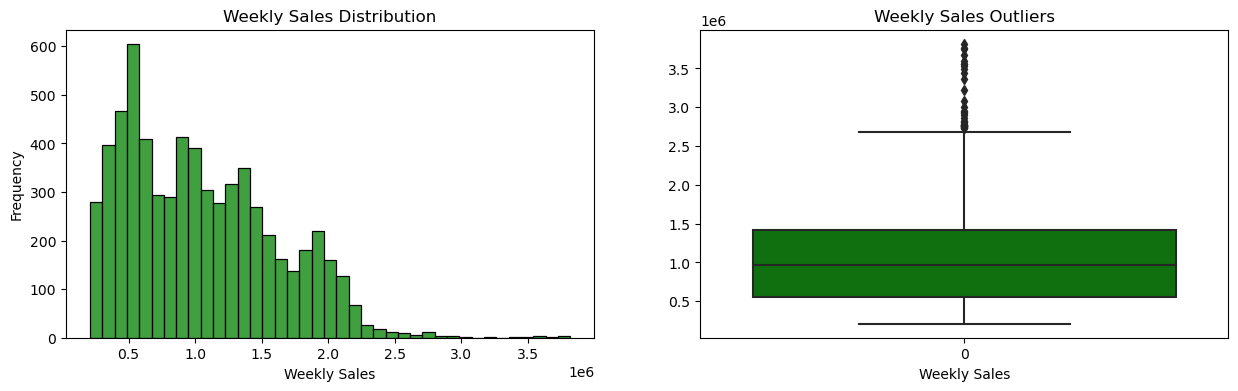

<Figure size 640x480 with 0 Axes>

In [20]:
#Let's see outliers in Weekly Sales:


fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 4))


sns.histplot(data['Weekly_Sales'], kde=False, ax=ax1, color='green')
ax1.grid(False)
ax1.set_title('Weekly Sales Distribution')
ax1.set_xlabel('Weekly Sales')
ax1.set_ylabel('Frequency')


sns.boxplot(data['Weekly_Sales'], ax=ax2, color='green')
ax2.grid(False)
ax2.set_title('Weekly Sales Outliers')
ax2.set_xlabel('Weekly Sales')

plt.show()
plt.savefig('weeklysales.jpeg')

We can see there are few outliers in the weekly sales data. Now let's check it for feather's too.

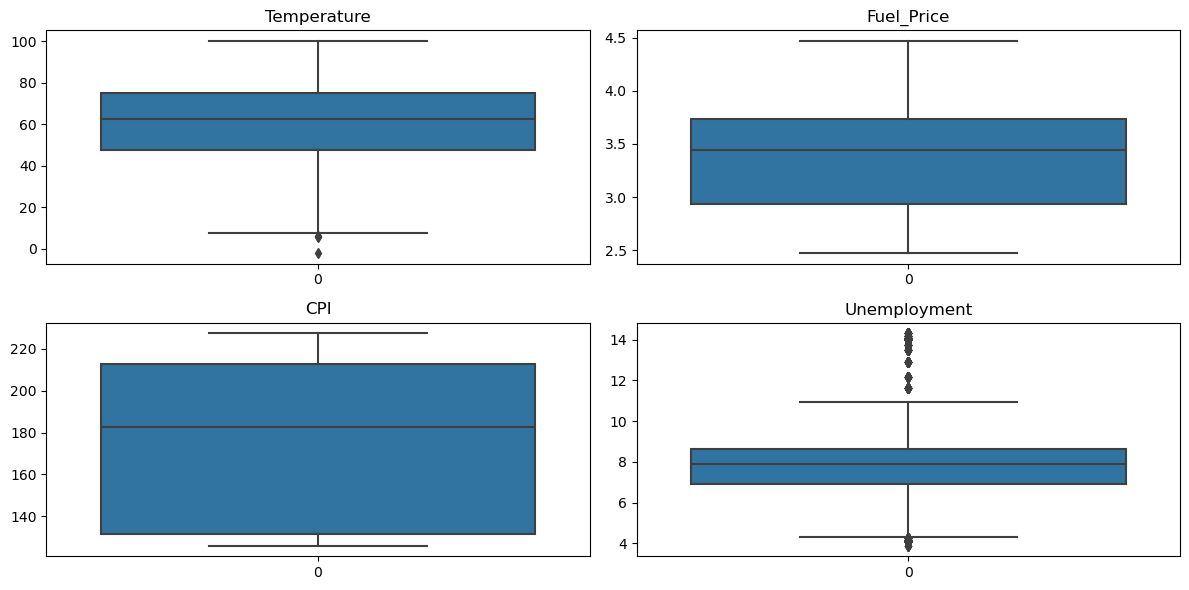

Outliers in Temperature:
           Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                    
2011-02-04     7     558027.77         False        -2.06       3.011   

                   CPI  Unemployment  Year  Month  Week  
Date                                                     
2011-02-04  191.762589         8.818  2011      2     5  
Outliers in Unemployment:
           Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                    
2010-02-05    12    1100046.37         False        49.47       2.962   
2010-02-12    12    1117863.33          True        47.87       2.946   
2010-02-19    12    1095421.65         False        54.83       2.915   
2010-02-26    12    1048617.17         False        50.23       2.825   
2010-03-05    12    1077018.27         False        53.77       2.987   
...          ...           ...           ...

In [16]:
#Checking outliers for other feathers:

numerical_cols = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']


plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

#Statistical methods using z-scores:
from scipy import stats

threshold = 3
outliers = {}
for col in numerical_cols:
    z_scores = stats.zscore(data[col])
    outliers[col] = data[(z_scores > threshold) | (z_scores < -threshold)]

#Print outliers:
for col, outlier_df in outliers.items():
    if not outlier_df.empty:
        print(f"Outliers in {col}:")
        print(outlier_df)

## Correlation Analysis:

C:\Users\PC\AppData\Local\Temp\ipykernel_21940\3173722794.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


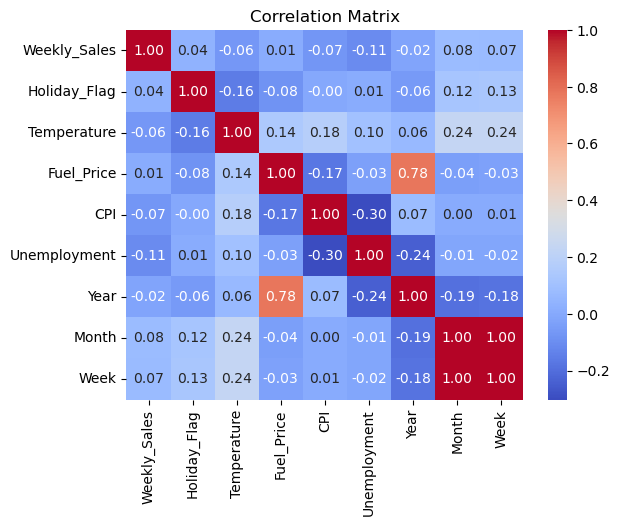

In [23]:
#Plotting correlation Matrix:

correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Total weekly sales is slightly dependent on holidays, Fuel price. Rest all factors have negative correlation with total weekly sales.


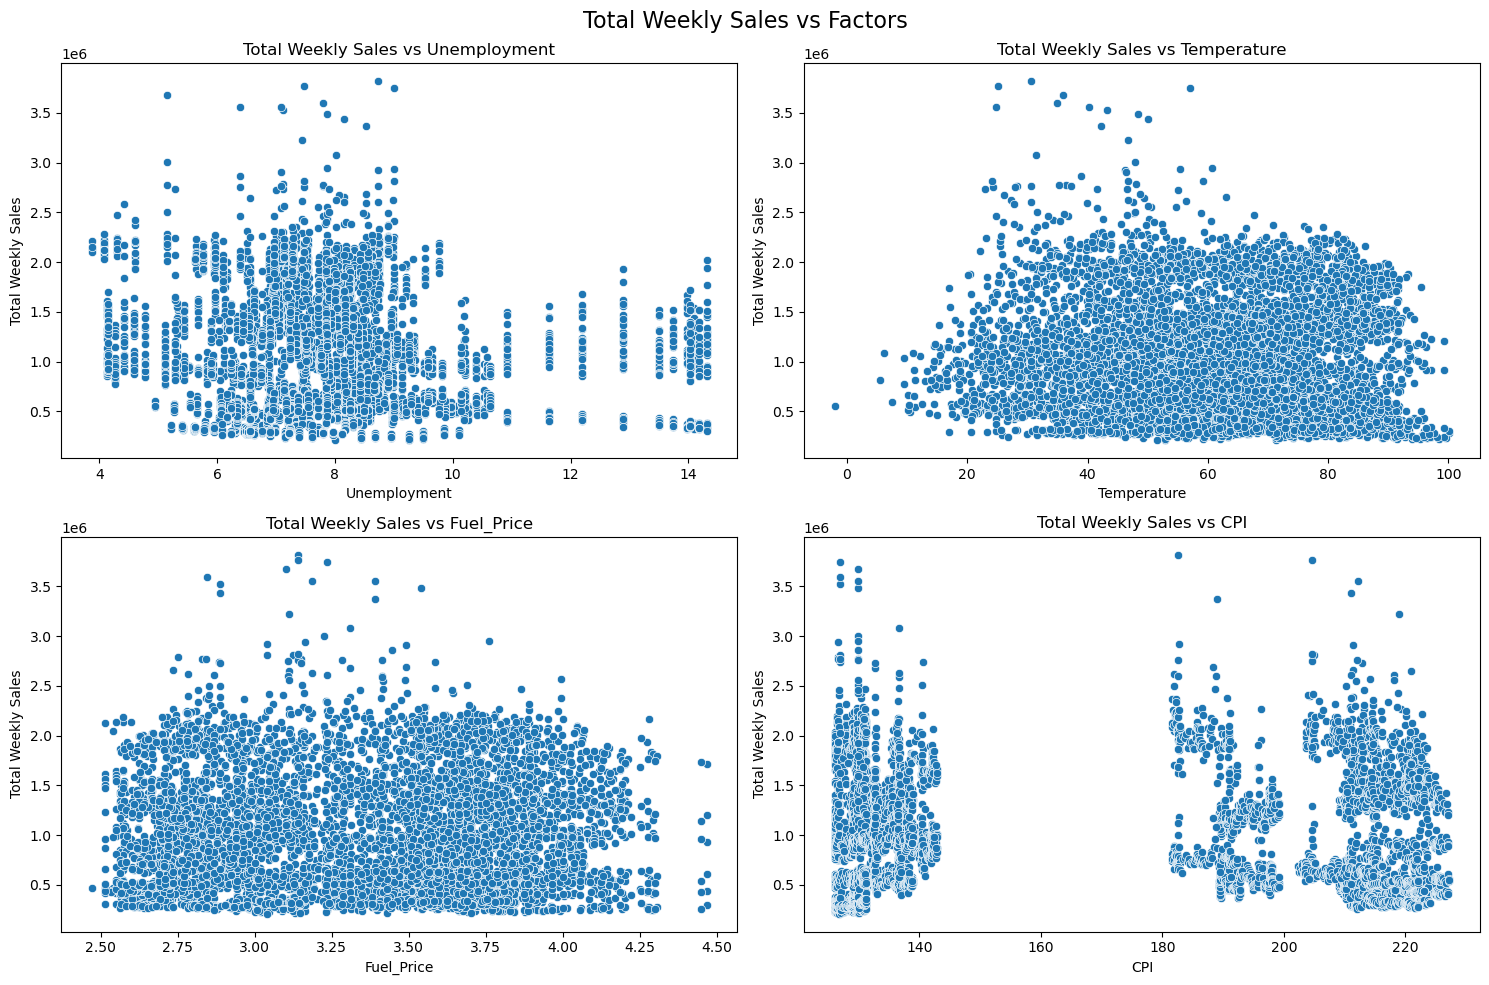

In [18]:
#List of factors (columns) for which we want to compare with total weekly sales:

factors = ['Unemployment', 'Temperature', 'Fuel_Price', 'CPI']

#the number of rows and columns for subplots:
num_factors = len(factors)
num_rows = 2
num_cols = 2

#Plotting scatter plots for each factor in subplots:
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
fig.suptitle('Total Weekly Sales vs Factors', fontsize=16)

for i, factor in enumerate(factors):
    row = i // num_cols
    col = i % num_cols
    sns.scatterplot(x=factor, y='Weekly_Sales', data=data, ax=axes[row, col])
    axes[row, col].set_title(f'Total Weekly Sales vs {factor}')
    axes[row, col].set_xlabel(factor)
    axes[row, col].set_ylabel('Total Weekly Sales')

plt.tight_layout()
plt.show()

Compare Average Sales between Holiday Week and Normal Week.

In [19]:
avg_sales = data.groupby('Holiday_Flag')['Weekly_Sales'].mean().reset_index()
avg_sales.rename(columns={'Weekly_Sales': 'Average_Sales'}, inplace=True)

#Replacing values in the Holiday_Flag column:

avg_sales['Holiday_Flag'] = avg_sales['Holiday_Flag'].replace({0: 'Non-Holiday Week', 1: 'Special Holiday Week'})

avg_sales

,Holiday_Flag,Average_Sales
0,False,1.041256e+06
1,True,1.122888e+06


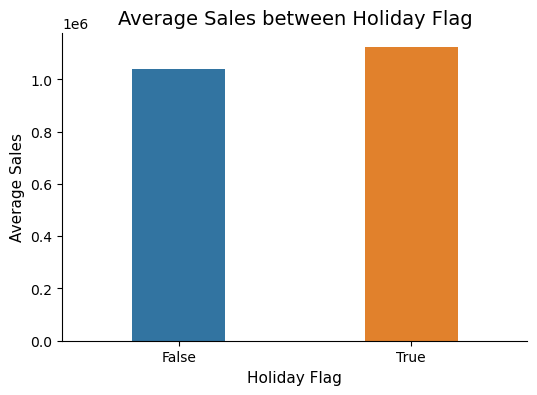

In [20]:
#creating the plot:

plt.figure(figsize = (6, 4))


ax = sns.barplot(data = avg_sales, x = 'Holiday_Flag', y = 'Average_Sales', width = 0.4)
ax.set_xticklabels(ax.get_xticklabels())
ax.grid(False)


ax.set_xlabel('Holiday Flag', fontsize = 11)
ax.set_ylabel('Average Sales', fontsize = 11)
ax.set_title('Average Sales between Holiday Flag', fontsize = 14)

sns.despine()

##  Impact of Unemployment Rate on Weekly Sales:

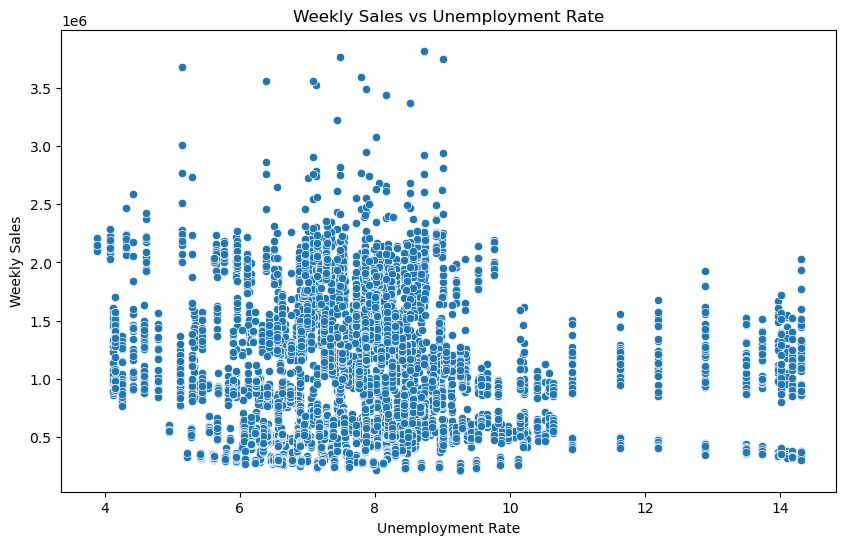

Correlation between Unemployment Rate and Weekly Sales: -0.10617608965795416
Stores most affected by Unemployment Rate: [(36, 'Unemployment'), (35, 'Unemployment'), (21, 'Unemployment')]


C:\Users\PC\AppData\Local\Temp\ipykernel_2564\1681253986.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  store_unemployment_corr = data.groupby('Store')['Unemployment', 'Weekly_Sales'].corr().iloc[0::2,-1]


In [21]:
#Scatter plot to visualize relationship between Unemployment and Weekly Sales:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=data)
plt.title('Weekly Sales vs Unemployment Rate')
plt.xlabel('Unemployment Rate')
plt.ylabel('Weekly Sales')
plt.show()

#Calculating correlation between Unemployment and Weekly Sales:

correlation = data['Unemployment'].corr(data['Weekly_Sales'])
print("Correlation between Unemployment Rate and Weekly Sales:", correlation)

#Identifying stores most affected by unemployment (by correlation):

store_unemployment_corr = data.groupby('Store')['Unemployment', 'Weekly_Sales'].corr().iloc[0::2,-1]
most_affected_stores = store_unemployment_corr.sort_values(ascending=False).head(3).index.tolist()
print("Stores most affected by Unemployment Rate:", most_affected_stores)


As we can see unemployment has negative correlation with weekly sales, hence there is not direct dependence.

## Seasonal Trend in Weekly Sales:

<Figure size 2000x500 with 0 Axes>

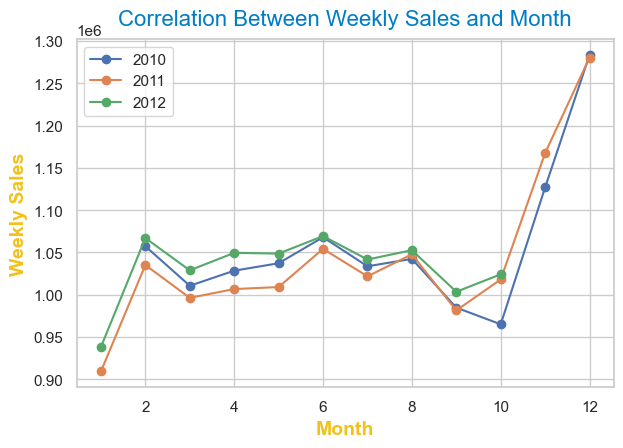

In [22]:
#Correlation between Weekly Sales & Month:

plt.figure(figsize=(20, 5))
sns.set_theme(style="whitegrid")
month_wise_sales = data.pivot_table(values="Weekly_Sales", columns="Year", index="Month")
month_wise_sales.plot(marker='o')

plt.title('Correlation Between Weekly Sales and Month', color='#007DC6', fontsize=16, pad=10)

plt.xlabel('Month', color='#F1C21B',  fontweight='bold', fontsize=14)
plt.ylabel('Weekly Sales', color='#F1C21B',  fontweight='bold', fontsize=14)

plt.legend(loc='upper left')
plt.tight_layout()


plt.show()

## Impact of Temperature on Weekly Sales:

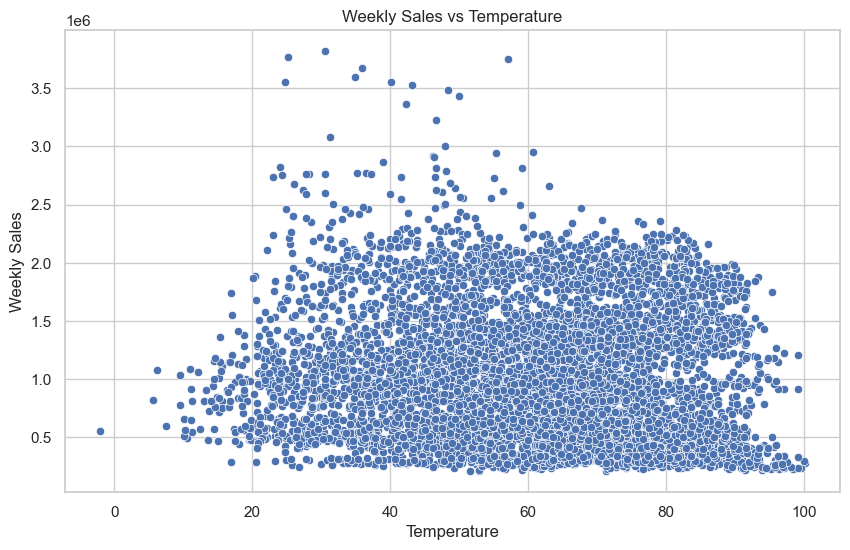

Correlation between Temperature and Weekly Sales: -0.06381001317946962


In [23]:
#Scatter plot to visualize relationship between Temperature and Weekly Sales:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=data)
plt.title('Weekly Sales vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()

#correlation between Temperature and Weekly Sales
correlation = data['Temperature'].corr(data['Weekly_Sales'])
print("Correlation between Temperature and Weekly Sales:", correlation)


Temperature also doesnot have direct effect on weekly sales.

## Effect of Consumer Price Index (CPI) on Weekly Sales:

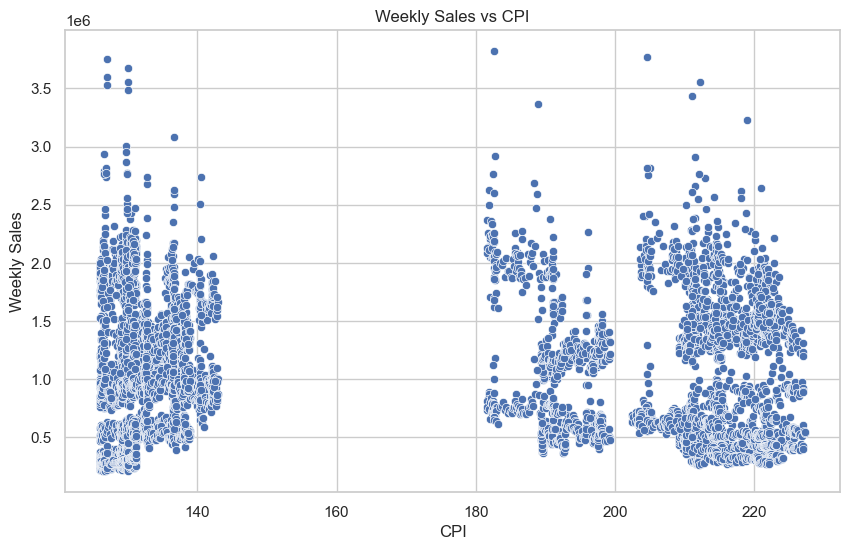

Correlation between CPI and Weekly Sales: -0.07263416204017645


In [24]:
#Scatter plot to visualize relationship between CPI and Weekly Sales:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='CPI', y='Weekly_Sales', data=data)
plt.title('Weekly Sales vs CPI')
plt.xlabel('CPI')
plt.ylabel('Weekly Sales')
plt.show()

#correlation between CPI and Weekly Sales:

correlation = data['CPI'].corr(data['Weekly_Sales'])
print("Correlation between CPI and Weekly Sales:", correlation)


CPI also doesnot have direct effect on weekly sales.

## Top Performing Stores:

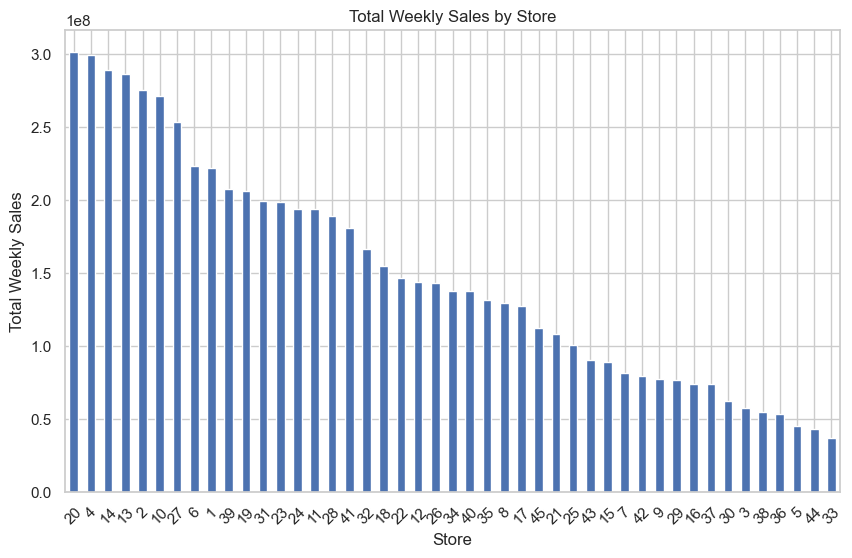

In [25]:
#Calculating total sales for each store and plot:

total_sales_per_store = data.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
total_sales_per_store.plot(kind='bar')
plt.title('Total Weekly Sales by Store')
plt.xlabel('Store')
plt.ylabel('Total Weekly Sales')
plt.xticks(rotation=45)
plt.show()



From the bar plot above we can see store 20 is the top performing store.

## Worst Performing Store and Difference with Top Performers:

Worst Performing Store: 33
Difference in Total Weekly Sales between Top and Worst Performing Stores: 264237570.49999997


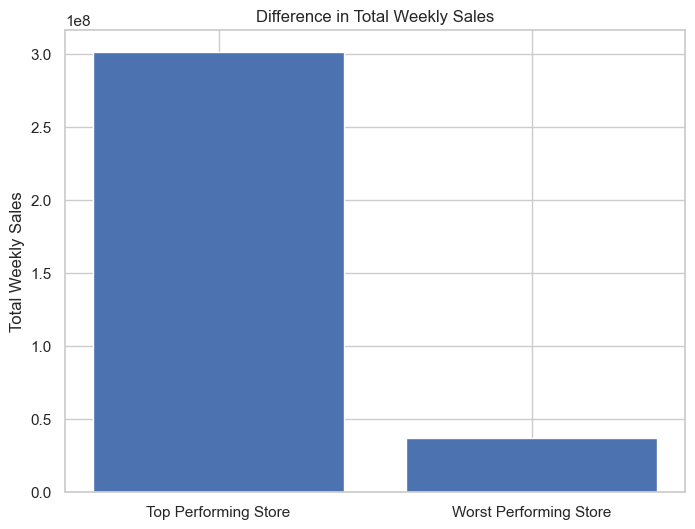

In [26]:
total_sales_per_store = data.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=True)
worst_performing_store = total_sales_per_store.idxmin()
print("Worst Performing Store:", worst_performing_store)

top_performing_store = total_sales_per_store.idxmax()
sales_difference = total_sales_per_store[top_performing_store] - total_sales_per_store[worst_performing_store]
print("Difference in Total Weekly Sales between Top and Worst Performing Stores:", sales_difference)

plt.figure(figsize=(8, 6))
plt.bar(['Top Performing Store', 'Worst Performing Store'], [total_sales_per_store[top_performing_store], total_sales_per_store[worst_performing_store]])
plt.title('Difference in Total Weekly Sales')
plt.ylabel('Total Weekly Sales')
plt.show()


## Weekly sales for each store:

C:\Users\PC\AppData\Local\Temp\ipykernel_2564\2591743823.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Weekly_Sales'], hist_kws=dict(edgecolor="black"))


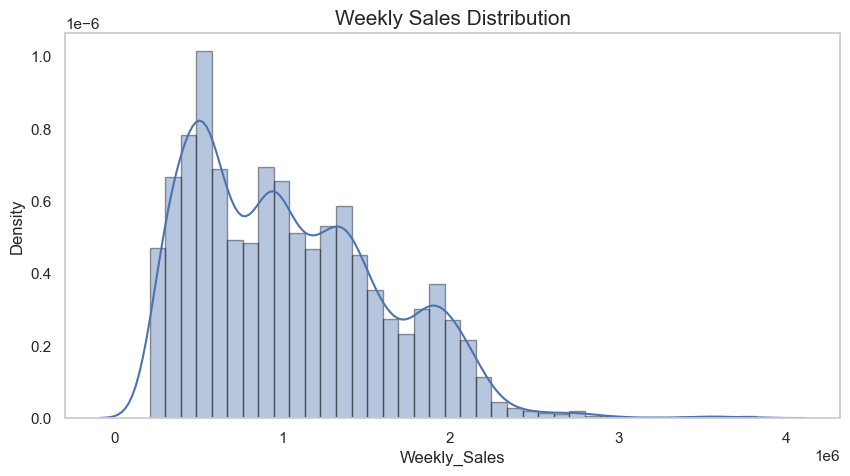

In [29]:
#Analyzing the distribution of target variable:

plt.figure(figsize = (10, 5))
sns.distplot(data['Weekly_Sales'], hist_kws=dict(edgecolor="black"))
plt.title('Weekly Sales Distribution', fontsize= 15)
plt.grid()
plt.show()

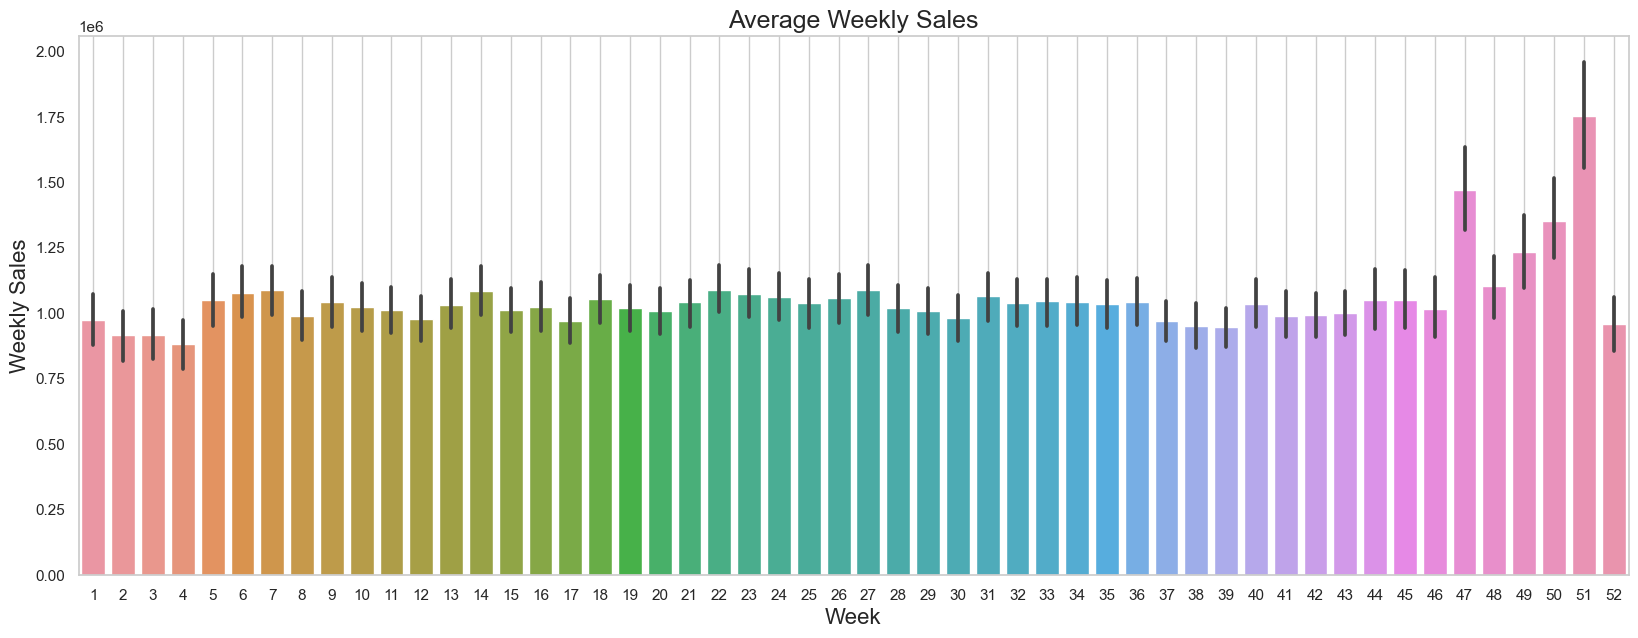

In [30]:
#Average weekly sales:

plt.figure(figsize=(20, 7))
sns.barplot(x='Week', y='Weekly_Sales', data=data)
plt.title('Average Weekly Sales', fontsize=18)
plt.ylabel('Weekly Sales', fontsize=16)
plt.xlabel('Week', fontsize=16)
plt.grid()
plt.show()

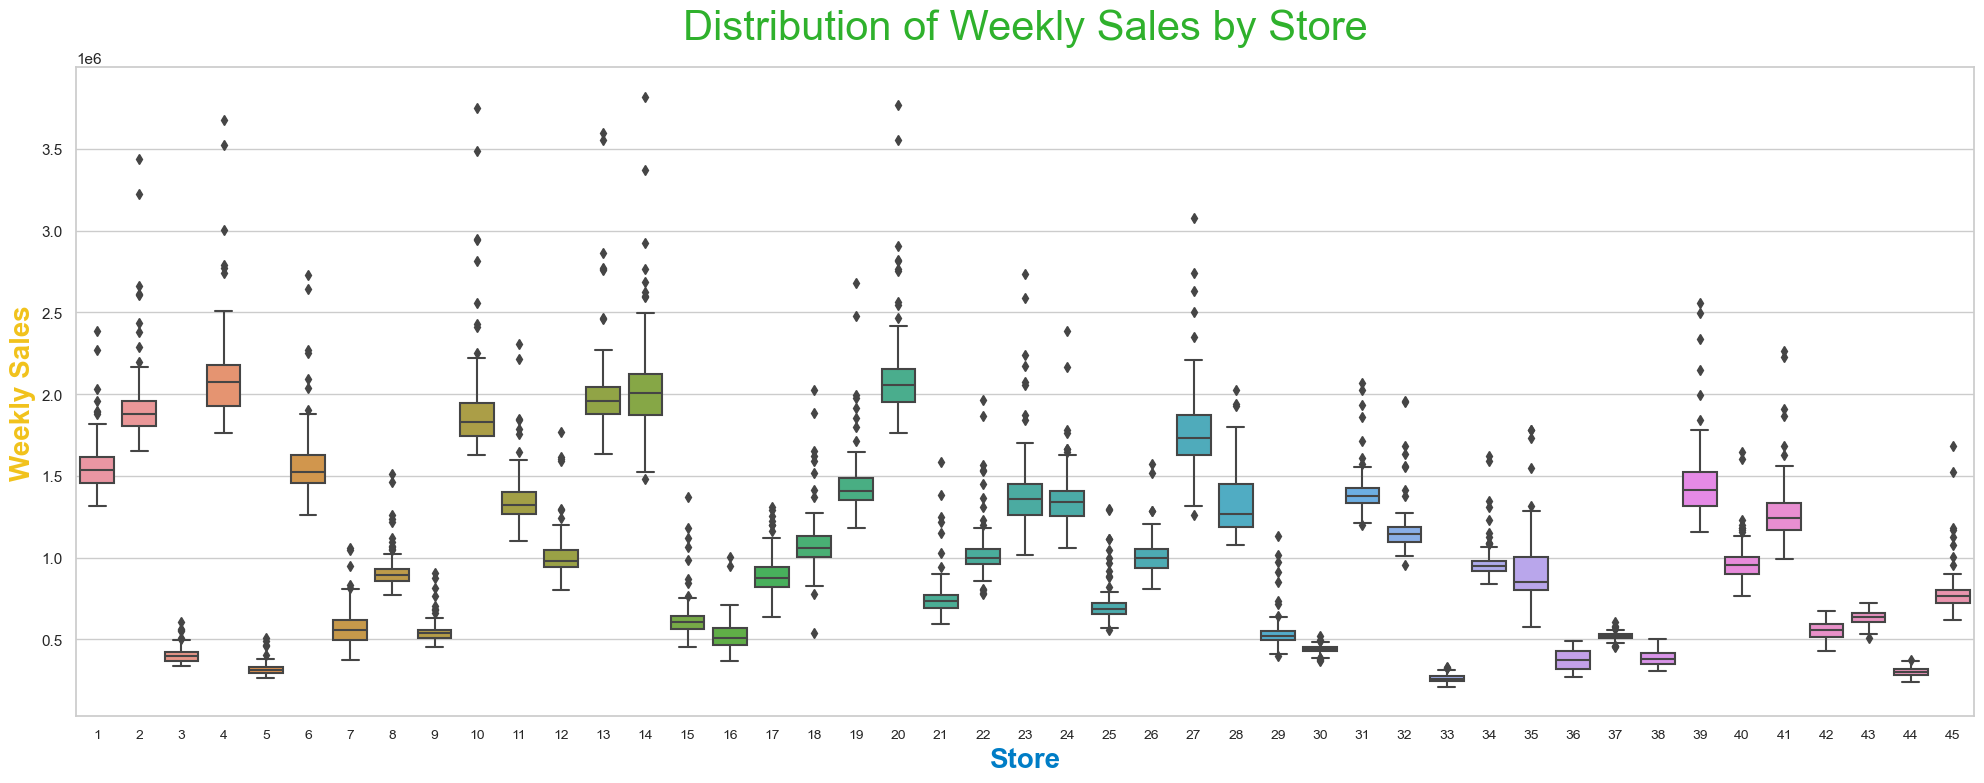

In [31]:
#Store-wise Weekly Sales:

plt.figure(figsize=(20, 8))

#Plotting the boxplot:
sns.boxplot(x='Store', y='Weekly_Sales', data=data)

#Setting the x and y labels with Walmart font colors:
plt.xlabel('Store', color='#007DC6', fontweight='bold', fontsize=20)
plt.ylabel('Weekly Sales', color='#F1C21B', fontweight='bold', fontsize=20)

#Setting the title with Walmart font colors:
plt.title('Distribution of Weekly Sales by Store', color='#2FB12C', fontsize=30, pad=20)

#Setting the font size for x-axis labels:
plt.xticks(fontsize=10)


plt.tight_layout()
plt.show()

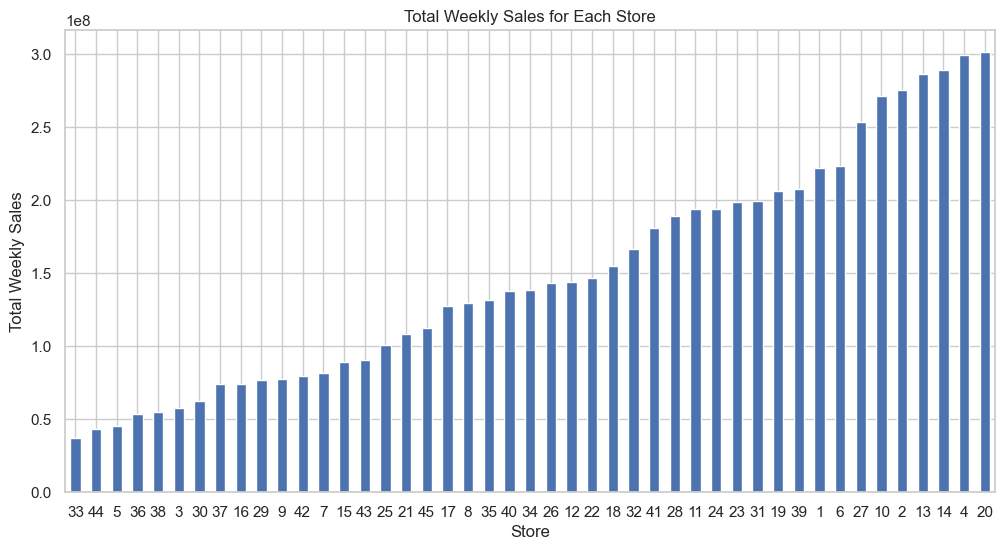

In [32]:
#Group data by store and calculate total weekly sales for each store:

total_weekly_sales = data.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=True)

#Plotting bar plot:

plt.figure(figsize=(12, 6))
total_weekly_sales.plot(kind='bar')
plt.title('Total Weekly Sales for Each Store')
plt.xlabel('Store')
plt.ylabel('Total Weekly Sales')
plt.xticks(rotation=0)
plt.show()

Hence, top performing store is 20, 4, 14, 13, 2. Let's work on sell prediction on these stores.

In [26]:
#Let's store top performing stores in an array:

stores = [20, 4, 13, 14, 2]

# Time-Series:

To check whether our data is stationary or not, we can do statistical tests like Rolling Statistics,
Augmented Dickey-Fuller Test, KPSS Test: Kwiatkowski–Phillips–Schmidt–Shin (KPSS) tests. Here, we can go with adfuller test.

## Augmented Dickey-Fuller Test:

In [27]:
from statsmodels.tsa.stattools import adfuller

for store_id in stores:
    store_sales = data[data['Store'] == store_id]['Weekly_Sales']
    result = adfuller(store_sales)
    
    print(f'ADF test result for Store {store_id}:')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')
    
    if result[1] > 0.05:
        print("The data is not stationary")
    else:
        print("The data is stationary")
    
    print('\n')

ADF test result for Store 20:
ADF Statistic: -5.3937386928548285
p-value: 3.4912952838128635e-06
Critical Values:
   1%: -3.47864788917503
   5%: -2.882721765644168
   10%: -2.578065326612056
The data is stationary


ADF test result for Store 4:
ADF Statistic: -2.8793819840147084
p-value: 0.047798662236698805
Critical Values:
   1%: -3.4793722137854926
   5%: -2.8830370378332995
   10%: -2.578233635380623
The data is stationary


ADF test result for Store 13:
ADF Statistic: -5.502481711233357
p-value: 2.05644619369346e-06
Critical Values:
   1%: -3.47864788917503
   5%: -2.882721765644168
   10%: -2.578065326612056
The data is stationary


ADF test result for Store 14:
ADF Statistic: -2.7368866106752017
p-value: 0.06786986708375066
Critical Values:
   1%: -3.4793722137854926
   5%: -2.8830370378332995
   10%: -2.578233635380623
The data is not stationary


ADF test result for Store 2:
ADF Statistic: -3.708862572618915
p-value: 0.0039902070890662795
Critical Values:
   1%: -3.4793722137

## Seasonal Decomposition:

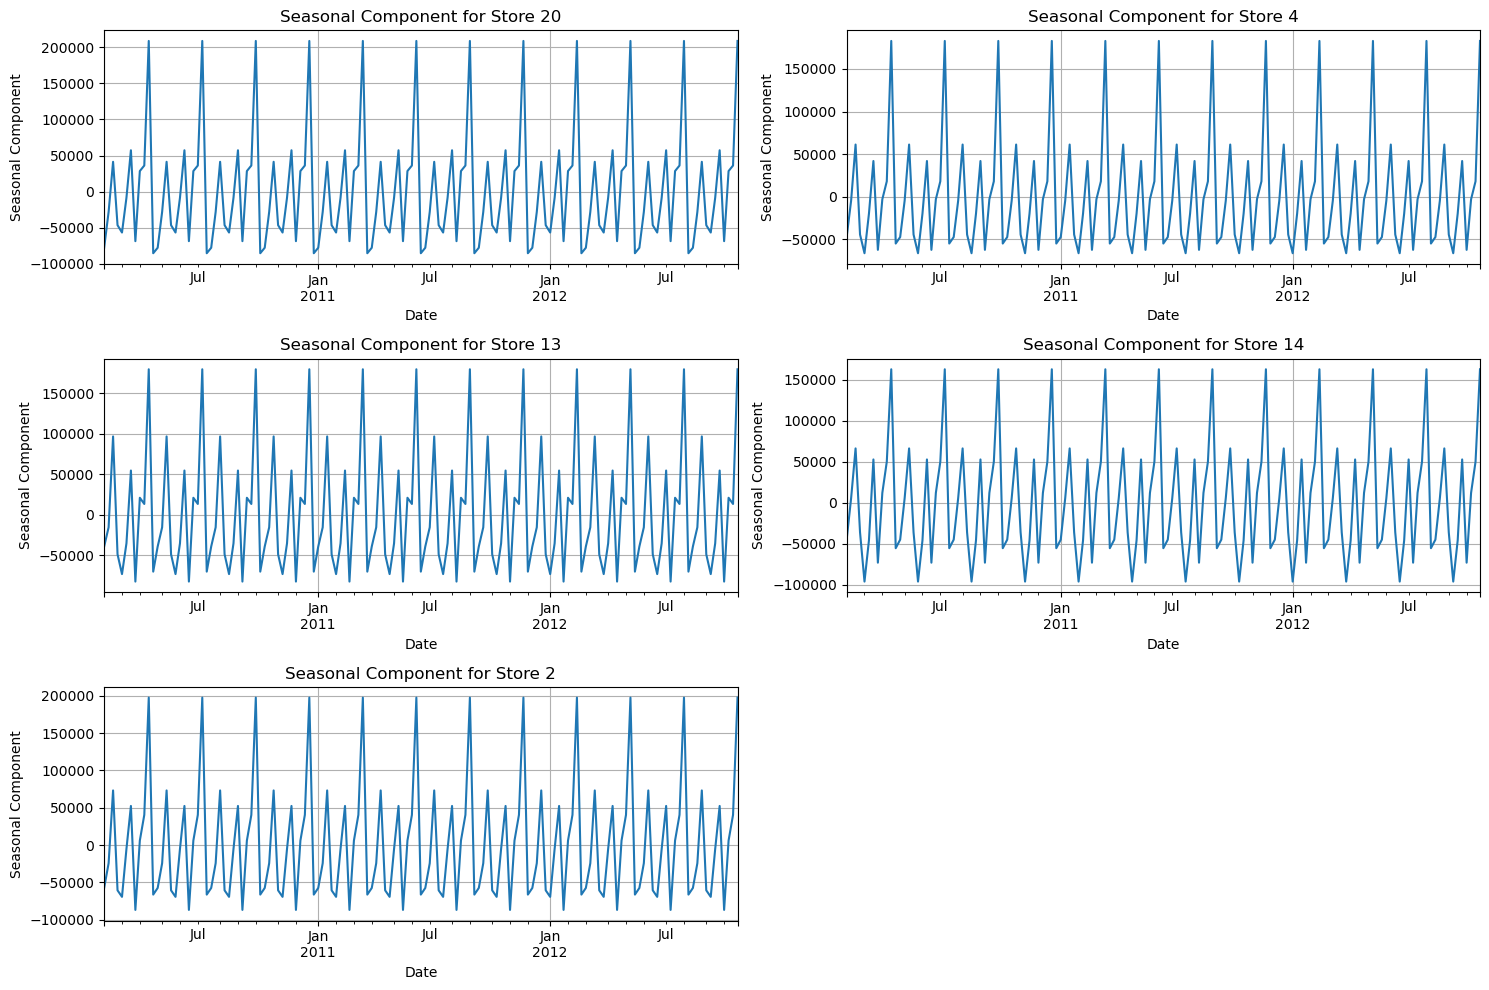

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose


plt.figure(figsize=(15, 10))

for i, store_id in enumerate(stores, 1):
    store_sales = data[data['Store'] == store_id]['Weekly_Sales']
    seasonal = seasonal_decompose(store_sales, period=12)
    
    plt.subplot(3, 2, i)
    seasonal.seasonal.plot()
    plt.title(f'Seasonal Component for Store {store_id}')
    plt.xlabel('Date')
    plt.ylabel('Seasonal Component')
    plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(15, 10))

for i, store_id in enumerate(stores, 1):
    store_sales = data[data['Store'] == store_id]['Weekly_Sales']
    seasonal = seasonal_decompose(store_sales, period=12)
    
    plt.subplot(3, 2, i)
    plt.plot(store_sales, label='Actual')
    plt.plot(seasonal.trend, label='Trend', linestyle='--')
    plt.plot(seasonal.seasonal, label='Seasonal')
    plt.plot(seasonal.resid, label='Residual', color='red', alpha=0.7)
    
    plt.title(f'Decomposition for Store {store_id}')
    plt.xlabel('Date')
    plt.ylabel('Component')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

## Random Forest Regressor:

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split 

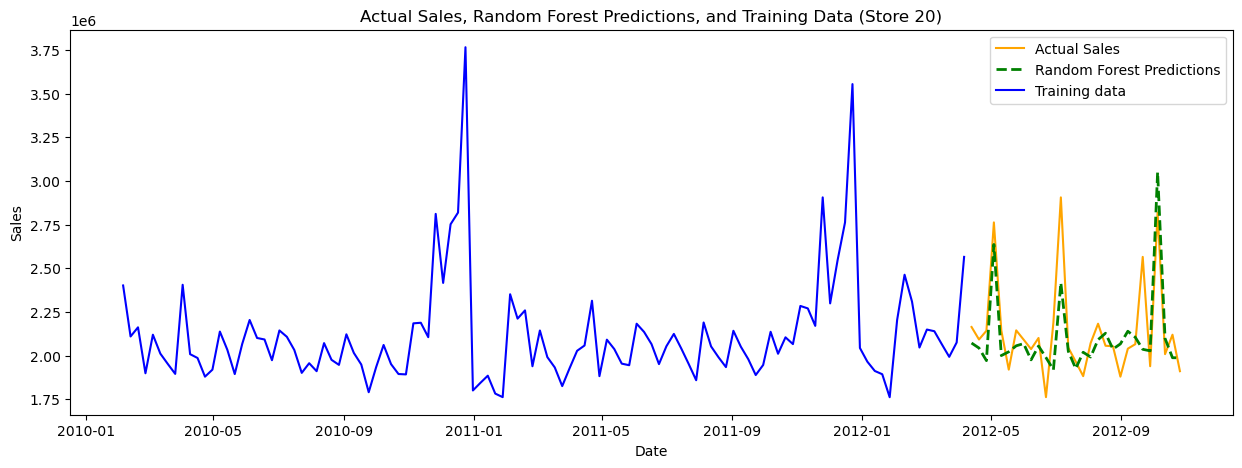

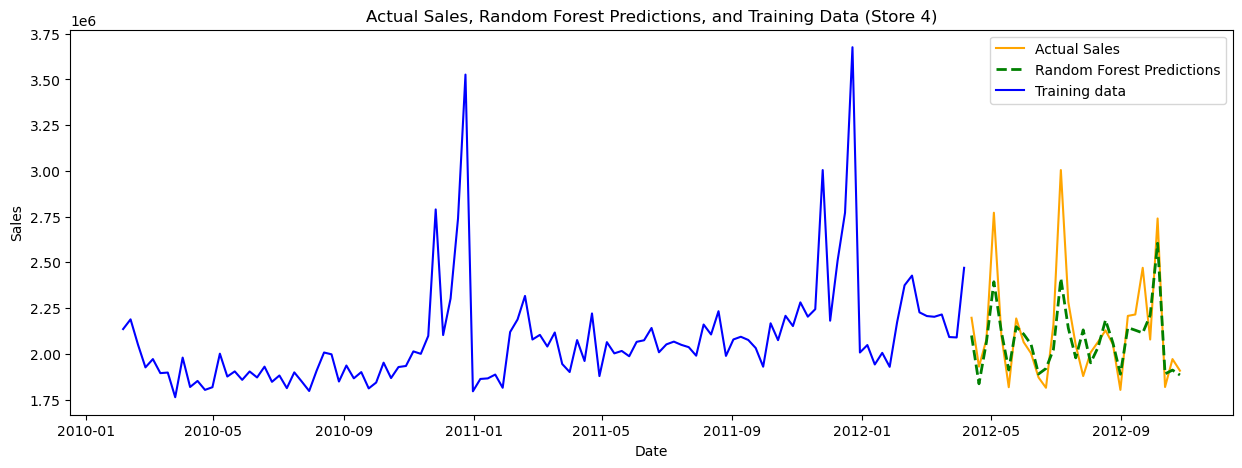

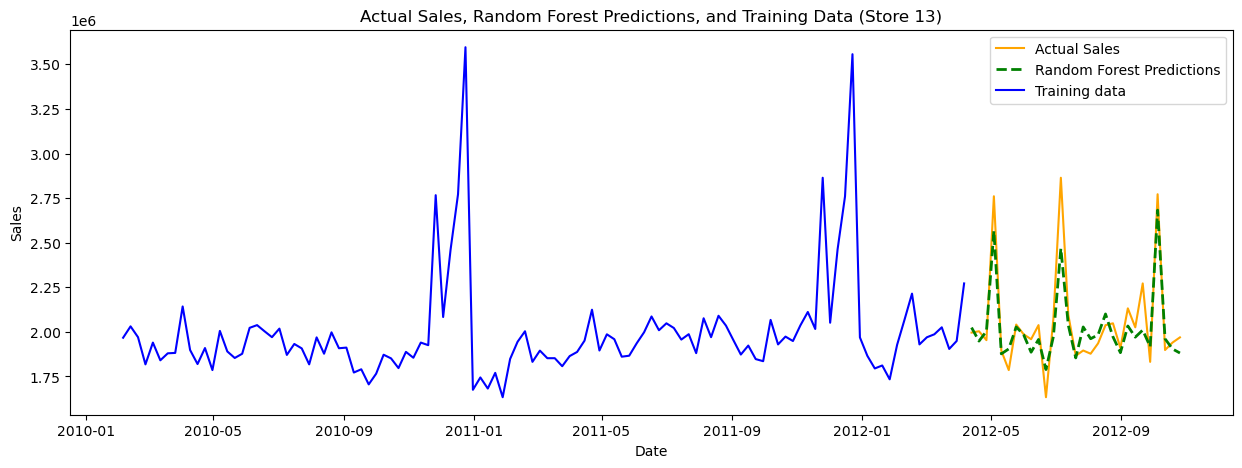

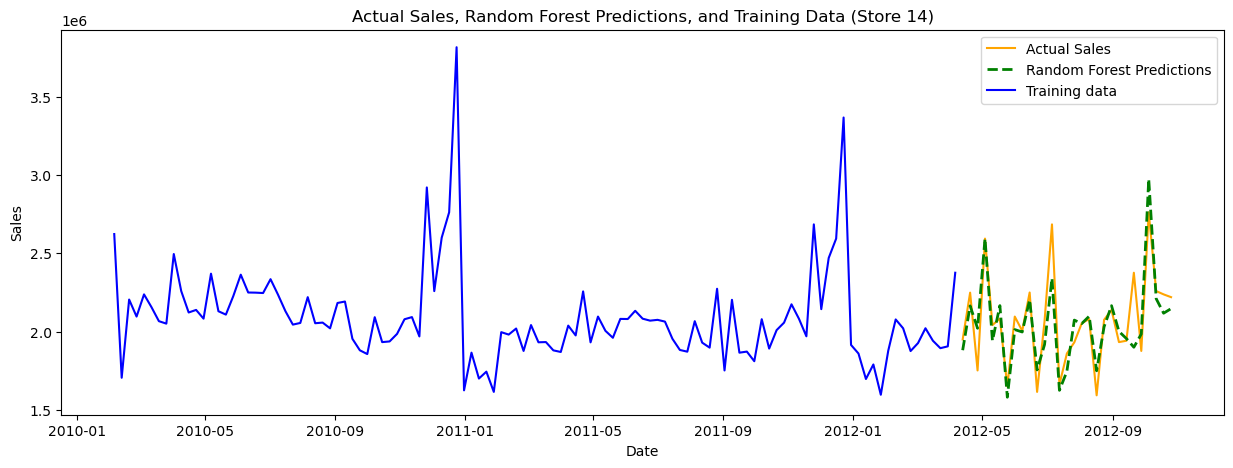

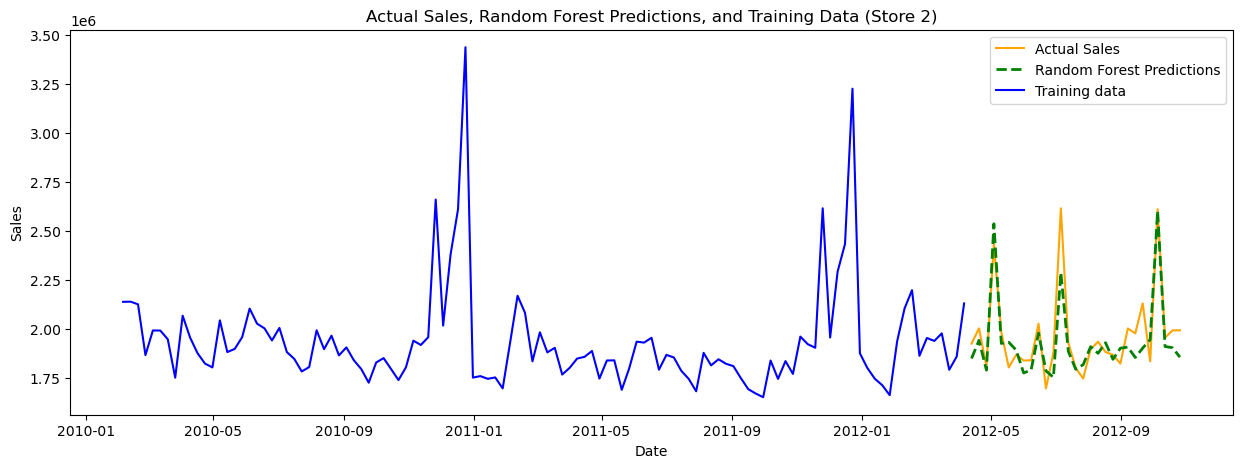

In [30]:
#Initializing lists to store model metrics:

Model, Data_Type, MAE, MSE, RMSE, Max_Diff, Mean_Diff, Min_Diff = [], [], [], [], [], [], [], []

for store_id in stores:
    #Extracting features and target variable for the store:
    store_data = data[data['Store'] == store_id]
    X = store_data.drop(['Weekly_Sales', 'Store'], axis=1)  
    y = store_data['Weekly_Sales']  #Target variable
    
    #Splitting the data into training and testing sets:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    #Training the Random Forest regressor:
    rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=30, n_jobs=-1, random_state=40)
    rf_regressor.fit(X_train, y_train)
    
    #Making predictions:
    rf_predictions = rf_regressor.predict(X_test)
    
    #Model evaluation metrics:
    mae = metrics.mean_absolute_error(y_test, rf_predictions)
    mse = metrics.mean_squared_error(y_test, rf_predictions)
    rmse = np.sqrt(mae)
    
    #Calculating differences between actual and predicted sales:
    diff = np.abs(rf_predictions - y_test)

    #Calculating min, mean, and max differences:
    min_diff = np.min(diff)
    mean_diff = np.mean(diff)
    max_diff = np.max(diff)
    
    #Adding index to predictions:
    rf_plot = pd.DataFrame({'Predictions': rf_predictions}, index=y_test.index)
    
    #Plotting:
    plt.figure(figsize=(15, 5))
    plt.plot(store_data.index[-len(X_test):], y_test, label='Actual Sales', color='orange')  # Plot actual sales
    plt.plot(store_data.index[-len(X_test):], rf_predictions, label='Random Forest Predictions', color='green', linestyle='--', linewidth=2)  # Plot Random Forest predictions
    plt.plot(store_data.index[:-len(X_test)], store_data['Weekly_Sales'][:-len(X_test)], label='Training data', color='blue')  # Plot training data
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.title(f'Actual Sales, Random Forest Predictions, and Training Data (Store {store_id})')
    plt.legend()
    plt.show()

    
    #Feature importance:
    rf_importance = pd.DataFrame({'Importance': rf_regressor.feature_importances_}, index=X.columns)
    
    #Store model metrics in lists:
    Model.append('Random Forest')
    Data_Type.append(f'Store {store_id}')
    MAE.append(mae)
    MSE.append(mse)
    RMSE.append(rmse)
    Min_Diff.append(min_diff)
    Mean_Diff.append(mean_diff)
    Max_Diff.append(max_diff)

In [33]:
#Displaying model metrics:
model_metrics_df = pd.DataFrame({
    'Model': Model,
    'Data_Type': Data_Type,
    'MAE': MAE,
    'MSE': MSE,
    'RMSE': RMSE,
    'Max_Diff': Max_Diff,
    'Mean_Diff': Mean_Diff,
    'Min_Diff': Min_Diff
})

print(model_metrics_df)

Empty DataFrame
Columns: [Model, Data_Type, MAE, MSE, RMSE, Max_Diff, Mean_Diff, Min_Diff]
Index: []


## ARIMA:

In [34]:
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA


Best model:  ARIMA(5,0,0)(0,0,0)[0]          
Total fit time: 4.097 seconds


C:\Users\PC\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


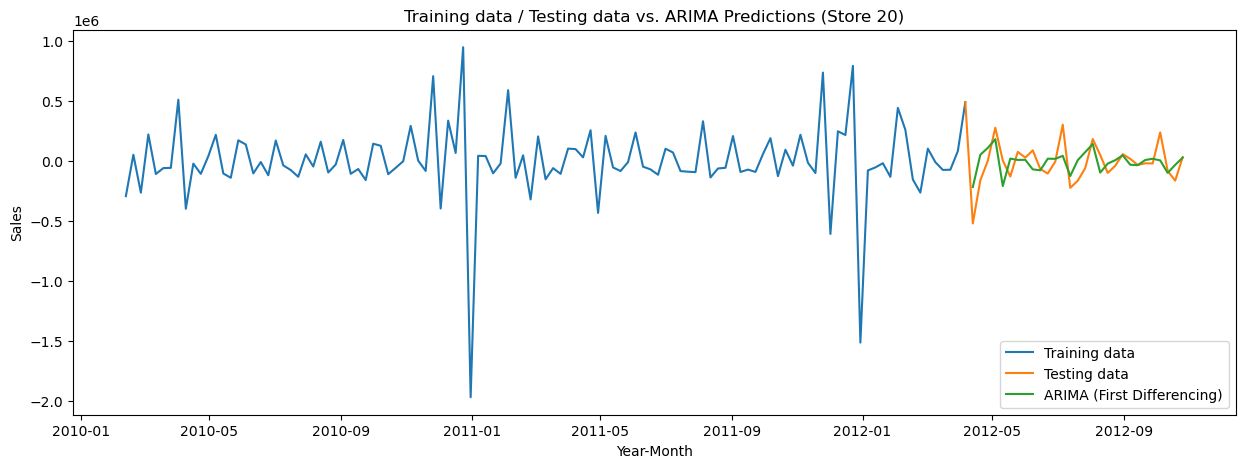


Best model:  ARIMA(2,0,3)(0,0,0)[0]          
Total fit time: 0.356 seconds


C:\Users\PC\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


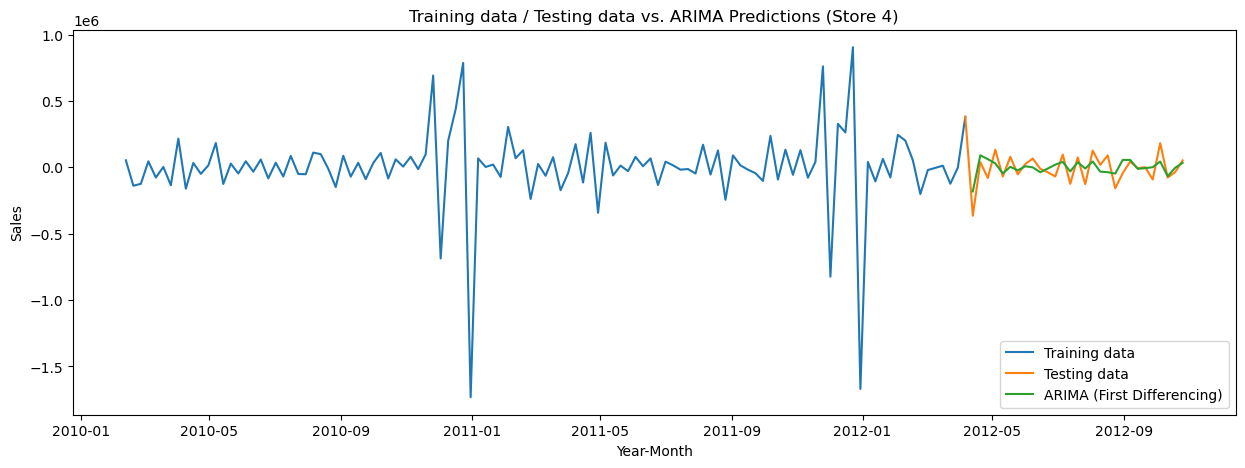


Best model:  ARIMA(0,0,5)(0,0,0)[0]          
Total fit time: 0.372 seconds


C:\Users\PC\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


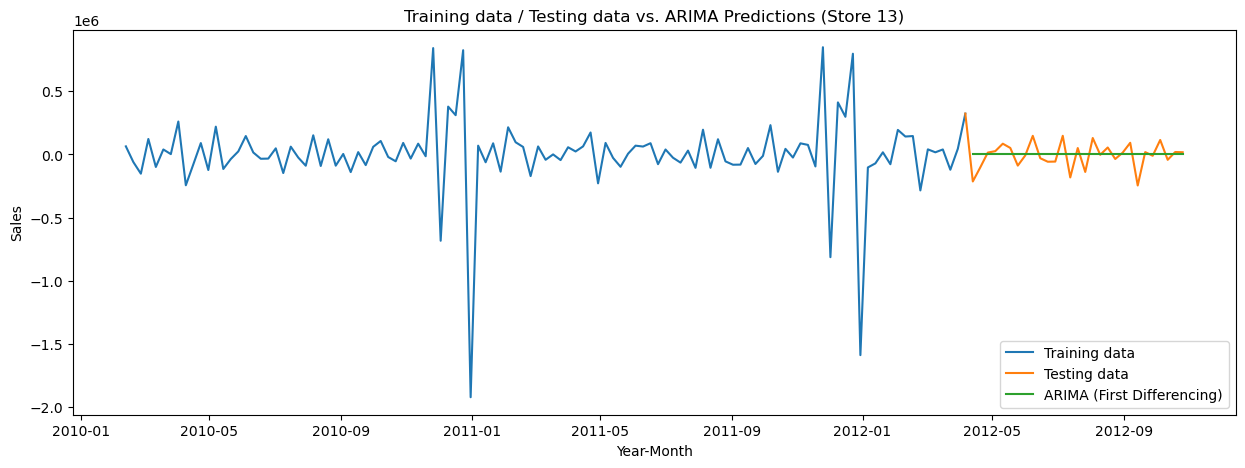


Best model:  ARIMA(0,0,5)(0,0,0)[0]          
Total fit time: 0.375 seconds


C:\Users\PC\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


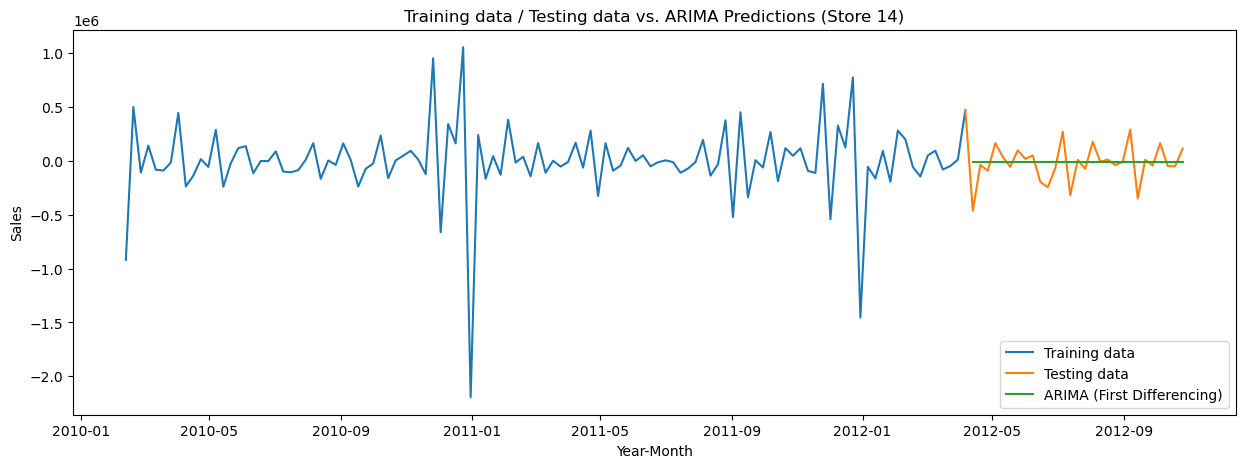


Best model:  ARIMA(2,0,3)(0,0,0)[0]          
Total fit time: 0.442 seconds


C:\Users\PC\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


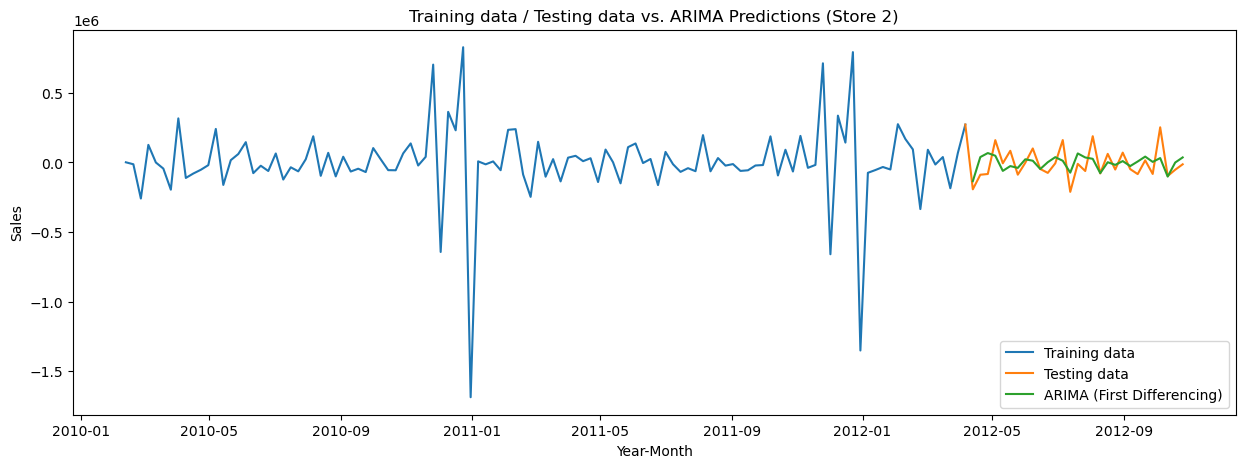

In [35]:
#Initializing lists to store model metrics:
Model, Data_Type, MAE, MSE, RMSE, Max_Diff, Mean_Diff, Min_Diff = [], [], [], [], [], [], [], []

for store_id in stores:
    #Extracting features and target variable for the store:
    store_data = data[data['Store'] == store_id]
    y = store_data['Weekly_Sales']  #Target variable
    
    #Performing first differencing:
    FirstDiff = y.diff().dropna()
    
    #Splitting the data into training and testing sets:
    FDTrain = FirstDiff.iloc[:-29]
    FDTest = FirstDiff.iloc[-29:]
    
    #Fit ARIMA model
    arima_parametersFD = auto_arima(FirstDiff, trace=True, suppress_warnings=True, n_jobs=-1, start_p=0, 
                                     start_q=0, start_P=0, start_Q=0, max_p=25, max_q=25, max_P=25, 
                                     max_Q=25, seasonal=False, maxiter=250, stepwise=False, D=1, max_D=15)
    
    ArimaFD = ARIMA(FirstDiff, order=(arima_parametersFD.order[0], 0, arima_parametersFD.order[1])).fit()
    
    #Making predictions:
    start, end = len(FDTrain), len(FDTrain) + len(FDTest) - 1
    ArimaPredictionsFD = ArimaFD.predict(start=start, end=end)
    
    #Model evaluation metrics:
    mae = metrics.mean_absolute_error(FDTest, ArimaPredictionsFD)
    mse = metrics.mean_squared_error(FDTest, ArimaPredictionsFD)
    rmse = np.sqrt(mae)
    
    #Plotting:
    plt.figure(figsize=(15, 5))
    plt.plot(FirstDiff[:len(FirstDiff) - len(FDTest)], label='Training data')
    plt.plot(FirstDiff[len(FirstDiff) - (len(FDTest) + 1):], label='Testing data')
    plt.plot(ArimaPredictionsFD, label='ARIMA (First Differencing)')
    plt.xlabel('Year-Month')
    plt.ylabel('Sales')
    plt.title(f'Training data / Testing data vs. ARIMA Predictions (Store {store_id})')
    plt.legend(loc='lower right')
    plt.show()
    
    #Store model metrics in lists:
    Model.append('ARIMA')
    Data_Type.append(f'Store {store_id}')
    MAE.append(mae)
    MSE.append(mse)
    RMSE.append(rmse)
    Min_Diff.append(np.min(np.abs((ArimaPredictionsFD - FDTest) / FDTest)) * 100)
    Mean_Diff.append(np.mean(np.abs((ArimaPredictionsFD - FDTest) / FDTest)) * 100)
    Max_Diff.append(np.max(np.abs((ArimaPredictionsFD - FDTest) / FDTest)) * 100)

In [37]:
#Displaying model metrics:
metrics_df = pd.DataFrame({
    'Model': Model,
    'Data_Type': Data_Type,
    'MAE': MAE,
    'MSE': MSE,
    'RMSE': RMSE,
    'Min_Diff (%)': Min_Diff,
    'Mean_Diff (%)': Mean_Diff,
    'Max_Diff (%)': Max_Diff
})
print(metrics_df)

   Model Data_Type            MAE           MSE        RMSE  Min_Diff (%)  \
0  ARIMA  Store 20  102329.746400  1.735231e+10  319.890210      7.332441   
1  ARIMA   Store 4   66425.661414  6.648409e+09  257.731763     13.202427   
2  ARIMA  Store 13   75757.147040  9.897236e+09  275.240162     96.675348   
3  ARIMA  Store 14  120431.397030  2.863904e+10  347.032271     22.170666   
4  ARIMA   Store 2   76724.236583  8.624386e+09  276.991402      0.309464   

   Mean_Diff (%)  Max_Diff (%)  
0     445.842369   5164.340939  
1     108.725871    478.564836  
2     100.408870    115.300780  
3     100.138815    173.320813  
4     193.278235    922.919130  


## SARIMA:

In [38]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

C:\Users\PC\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


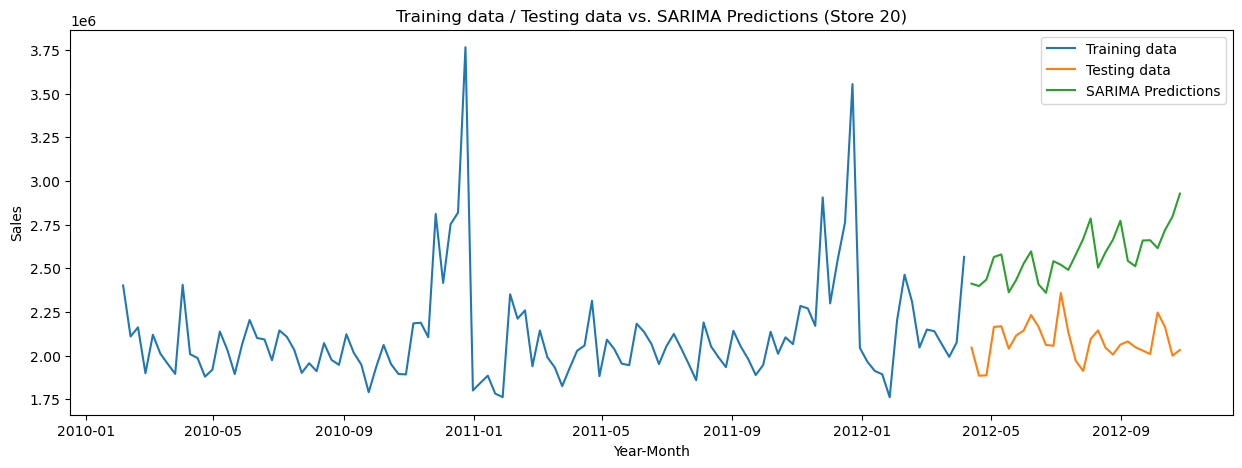

C:\Users\PC\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


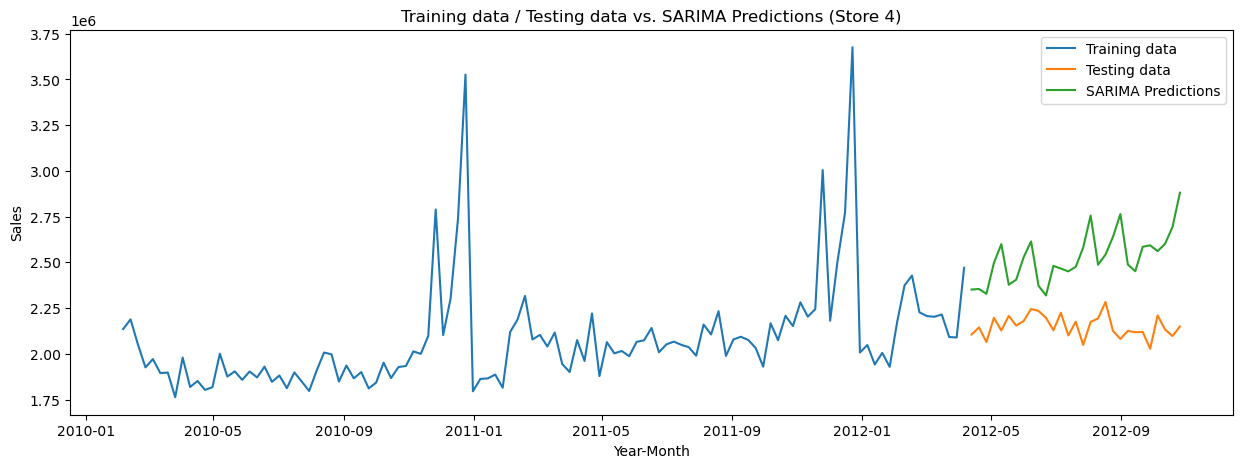

C:\Users\PC\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


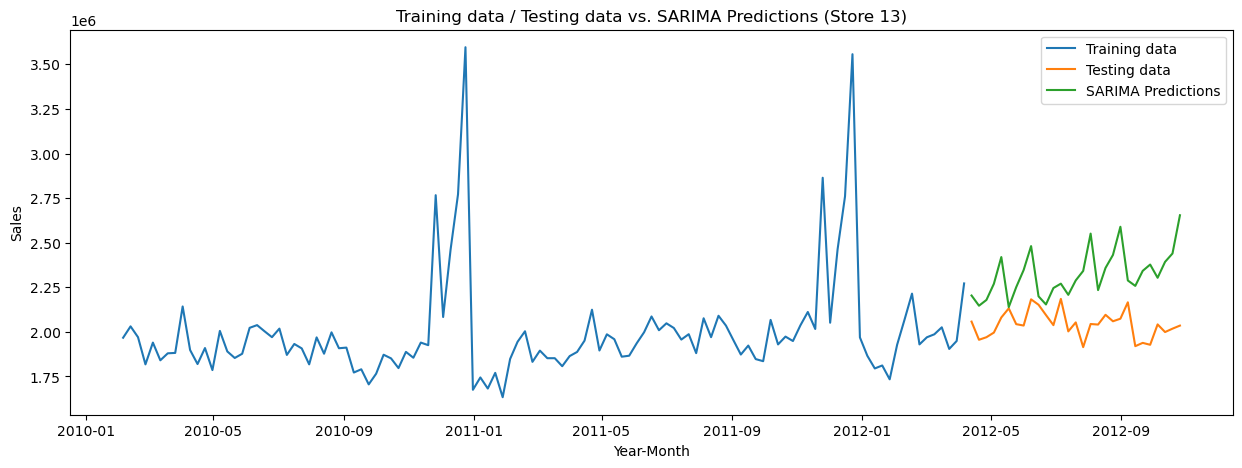

C:\Users\PC\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


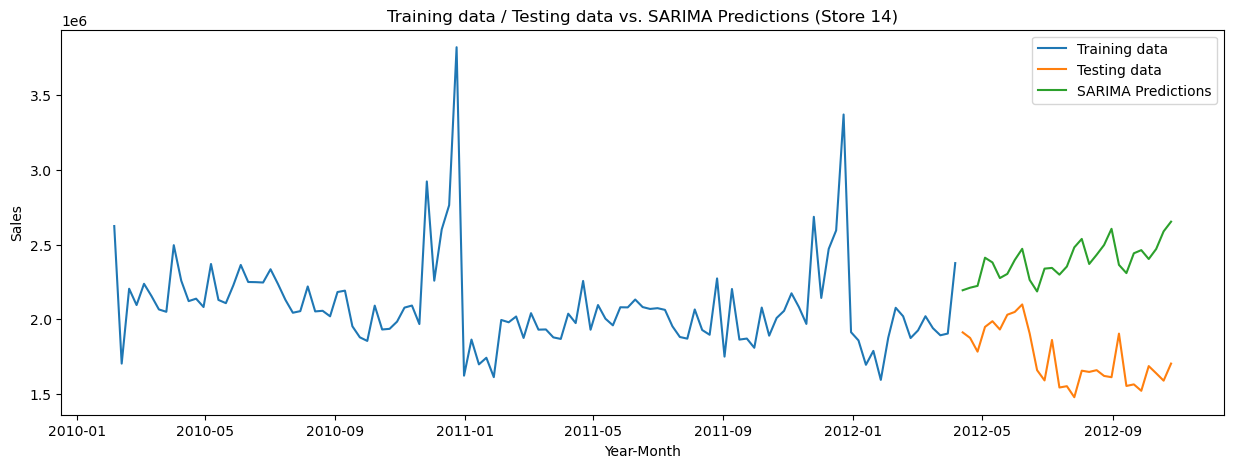

C:\Users\PC\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


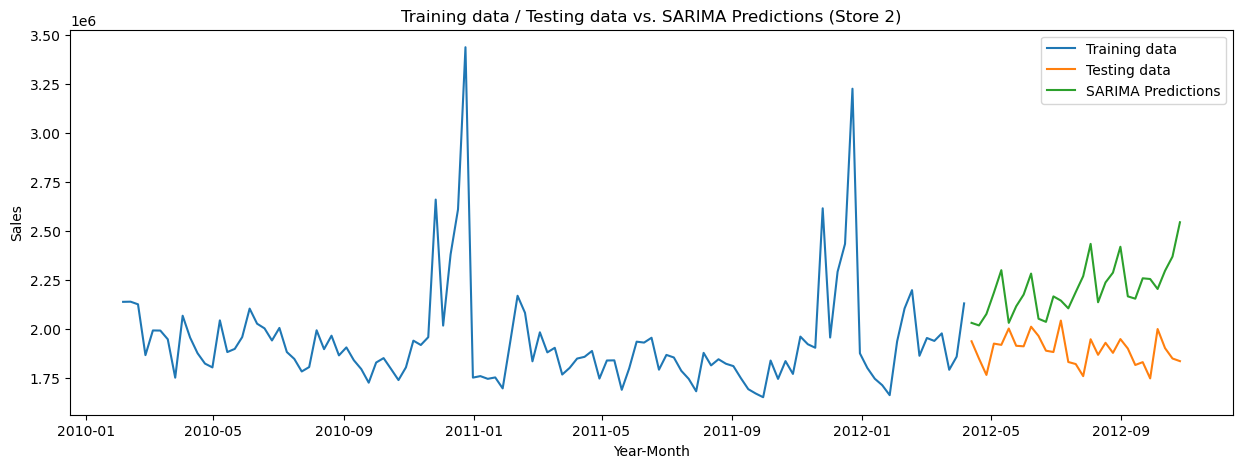

In [39]:
#InitializING lists to store model metrics
Model, Data_Type, MAE, MSE, RMSE, Max_Diff, Mean_Diff, Min_Diff = [], [], [], [], [], [], [], []

for store_id in stores:
    #Extracting features and target variable for the store:
    store_data = data[data['Store'] == store_id]['Weekly_Sales'] 
    train_data = store_data.iloc[:-29]  #Training data (excluding last 29 weeks)
    test_data = store_data.iloc[-29:]   #Testing data (last 29 weeks)
    
    #Fitting SARIMA model
    sarima_model = SARIMAX(train_data, order=(5, 1, 0), seasonal_order=(1, 1, 1, 12))  # Example order, you can adjust
    sarima_results = sarima_model.fit()
    
    #Making predictions
    sarima_predictions = sarima_results.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1,
                                                 typ='levels')
    
    #Model evaluation metrics
    mae = metrics.mean_absolute_error(test_data, sarima_predictions)
    mse = metrics.mean_squared_error(test_data, sarima_predictions)
    rmse = np.sqrt(mse)
    
    #Calculating differences between actual and predicted sales:
    diff = np.abs(rf_predictions - y_test)

    #Calculating min, mean, and max differences:
    min_diff = np.min(diff)
    mean_diff = np.mean(diff)
    max_diff = np.max(diff)
    
    #Plotting:
    plt.figure(figsize=(15, 5))
    plt.plot(store_data.index[:-29], train_data, label='Training data')
    plt.plot(store_data.index[-29:], test_data, label='Testing data')
    plt.plot(test_data.index, sarima_predictions, label='SARIMA Predictions')
    plt.xlabel('Year-Month')
    plt.legend()
    plt.ylabel('Sales')
    plt.title(f'Training data / Testing data vs. SARIMA Predictions (Store {store_id})')
    plt.show()
    
    #Store model metrics in lists:
    Model.append('SARIMA')
    Data_Type.append(f'Store {store_id}')
    MAE.append(mae)
    MSE.append(mse)
    RMSE.append(rmse)
    Min_Diff.append(min_diff)  
    Mean_Diff.append(mean_diff)  
    Max_Diff.append(max_diff)   

In [41]:
# Displaying model metrics:

metrics_df = pd.DataFrame({
    'Model': Model,
    'Data_Type': Data_Type,
    'MAE': MAE,
    'MSE': MSE,
    'RMSE': RMSE,
    'Min_Diff': Min_Diff,
    'Mean_Diff': Mean_Diff,
    'Max_Diff': Max_Diff
})

print(metrics_df)

    Model Data_Type            MAE           MSE           RMSE   Min_Diff  \
0  SARIMA  Store 20  494180.922290  2.748463e+11  524257.880857  6774.3737   
1  SARIMA   Store 4  374903.033965  1.649439e+11  406132.808174  6774.3737   
2  SARIMA  Store 13  279622.174641  1.000579e+11  316319.358761  6774.3737   
3  SARIMA  Store 14  644087.606296  4.751636e+11  689321.113512  6774.3737   
4  SARIMA   Store 2  312457.050578  1.210141e+11  347870.870955  6774.3737   

      Mean_Diff     Max_Diff  
0  81003.872338  328171.3695  
1  81003.872338  328171.3695  
2  81003.872338  328171.3695  
3  81003.872338  328171.3695  
4  81003.872338  328171.3695  


# Conclusion:

A detailed analysis on walmart sales dataset has been done. The EDA includes statistical analysis, data vizualization, correlation. Morever, triedto predict the data for upcoming weeks with ARIMA,  SARIMA models.